## 簡介
生成式對抗網路(GAN) - Generative Adversarial Network

- unsupervised learning
- 生成資料（造假？）
- 知名的影像轉換

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 

### 例子1: 改變年齡：青年、中年、老年
https://www.reddit.com/r/MachineLearning/comments/o6wggh/r_finally_actual_real_images_editing_using/

ex. Andrw Ng(台灣很有名的機器學習大師、開了很多machine learning 相關課程)

In [59]:
print("Origin")
path = "https://preview.redd.it/ypdxr9xe96771.jpg?width=1024&format=pjpg&auto=webp&s=897bee31c23cd0944e0155f7f7f5f6bf64f468ec"
Image(url= path, width=500, height=500)


Origin


In [58]:
print("Young")
Image(url= "https://preview.redd.it/35s7l8xe96771.jpg?width=1024&format=pjpg&auto=webp&s=d56d0f26ff5596c34ac4a20a8726bf92a68e831d", 
      width=500, height=500)


Young


In [61]:
print("Rotation")
path = "https://preview.redd.it/jlfslgxe96771.jpg?width=1024&format=pjpg&auto=webp&s=2179ba199da6e53b5cb5c1995679547c350feca2"
Image(url= path, width=500, height=500)


Rotation


### 例子2: 改變表情
https://www.reddit.com/r/MachineLearning/comments/o6wggh/r_finally_actual_real_images_editing_using/

In [62]:
print("Original")
path = "https://preview.redd.it/hn4rkqla96771.jpg?width=1024&format=pjpg&auto=webp&s=96a0c2568145779879601a9754a50335dd60b0ca"
Image(url= path, width=500, height=500)

Original


In [63]:
print("Smiling")
path = "https://preview.redd.it/60qjkqla96771.jpg?width=1024&format=pjpg&auto=webp&s=84382d9b1f79dabed63017979a534634a3e5362b"
Image(url= path, width=500, height=500)

Smiling


### 例子3: 老照片活起來
https://www.reddit.com/r/MachineLearning/comments/o6wggh/r_finally_actual_real_images_editing_using/

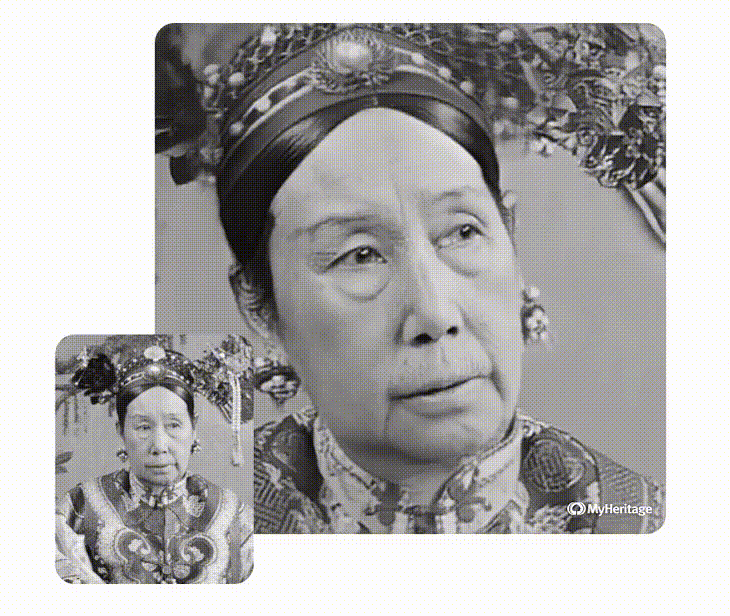

In [78]:
display(Image(data=open("active.gif",'rb').read(), format='png'))

[結論]

造假者需要做假的東西(假支票)出來，讓專家去判斷真偽，透過專家的判斷造假者在不斷的增進自己的造假技術，直到專家無法有效的判斷真偽。

- 生成器(Generator)：G生成的資料要去呼嚨D
    -> 用到大量數學運算式
- 辨別器(Discriminator):判斷「真」還是「假」


In [86]:
# path = "https://miro.medium.com/max/1400/1*hld4L6iM3Vv0zvlOty_ySg.png"
path = "https://i0.wp.com/clay-atlas.com/wp-content/uploads/2020/01/GAN.png?ssl=1"
Image(url= path, width=1000, height=500)

## 例子實作 

搭建 GAN 模型產生虛假的 MNIST 圖片

- MNIST手寫辨識資料集
- 這個資料集珍貴的地方在於已經有標註 Label 了(分別是使用 one hot encoding 來標注 0 到 9)

In [4]:
import torch.nn as nn


class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

[網上Referene]

- Discriminator 的部份，由於是要做 Mnist 圖片的分類器 (Classifier)，故最開始的 Tensor 輸入尺寸便是 784 (Mnist 的圖片為 28×28)，然後一路縮小 Fully Connected 的神經元數目，最後只剩一個神經元，使用 Sigmoid 激活函數輸出，來判斷是 Real 或 Fake 的圖片。
- Generator 則是輸入 Noise (噪音)，然後生成 28×28 (784) 的圖片，一樣，我這裡只使用了 Fully Connected。


### Training

上網查證, GAN 需要運用大量的運算，執行都要非常久，以下範例是以 GPU 執行已寫好範例程式碼，花了將近半天才跑完，是模擬 MNIST 的手寫數字生成任務。

ps. 用我自己電腦跑的結果

MNIST的內容就是手寫的數字0–9（圖片）

(32, 28, 28, 1)
tf.Tensor([4 6 7 3 2 4 2 8 7 1 4 7 6 2 5 5 8 4 0 4 1 0 9 7 9 2 1 6 4 2 1 8], shape=(32,), dtype=int64)


2022-08-23 16:12:01.986663: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


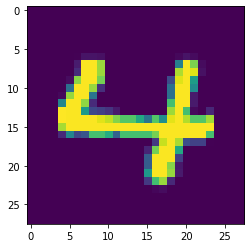

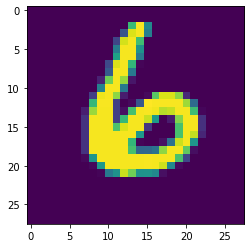

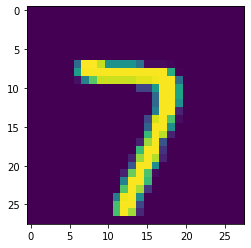

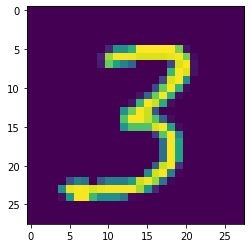

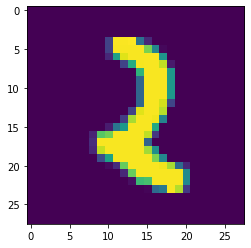

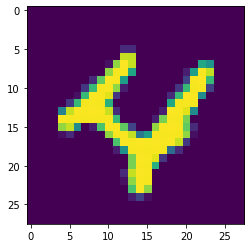

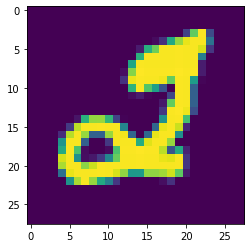

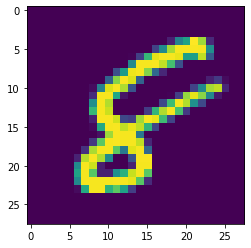

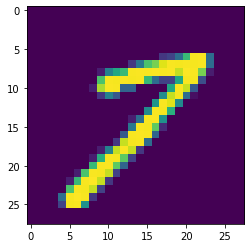

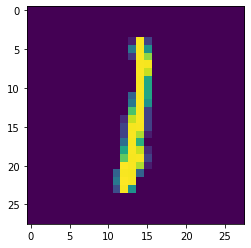

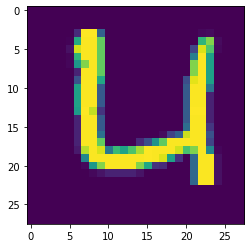

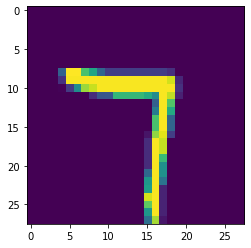

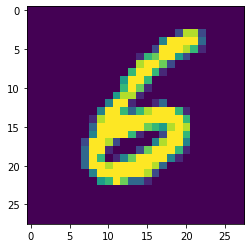

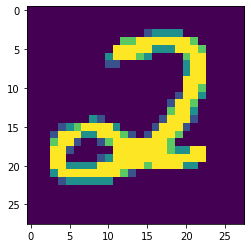

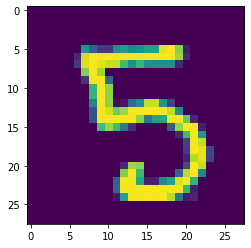

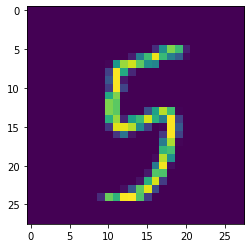

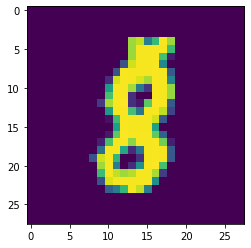

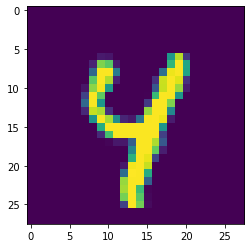

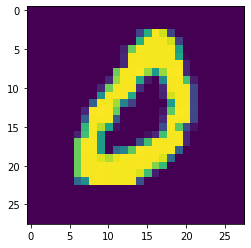

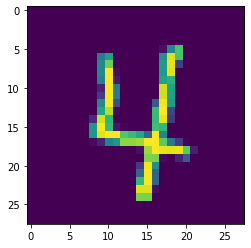

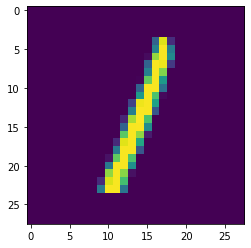

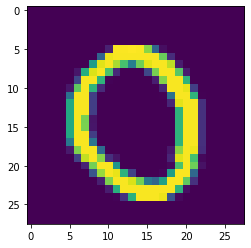

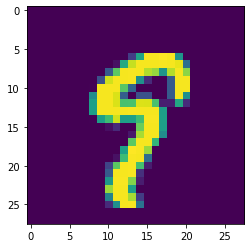

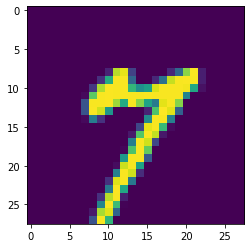

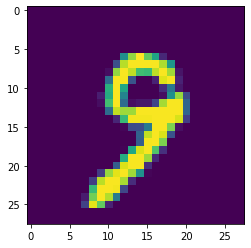

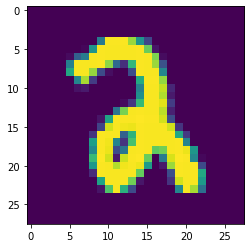

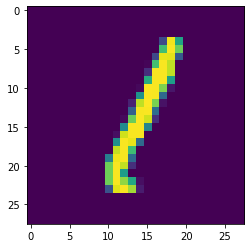

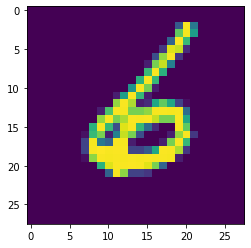

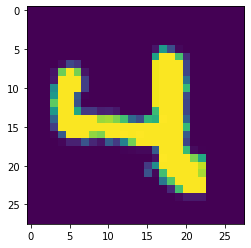

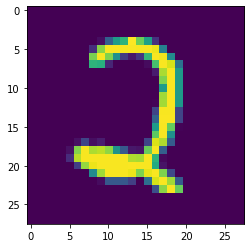

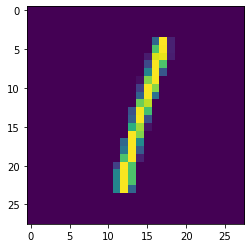

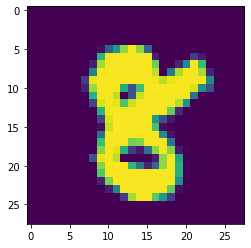

In [33]:
import tensorflow_datasets

mnist = tensorflow_datasets.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = mnist.shuffle(1024).repeat().batch(32)
for example in ds.take(1):
    image, label = example['image'], example['label']
    print(image.shape)
    print(label)
    
for i in image:
    plt.imshow(tf.squeeze(i))
    plt.show() 

In [29]:
mnist

{'test': <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'train': <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [39]:
(training_images, training_labels), (test_images, test_labels) =  tensorflow_datasets.as_numpy(tensorflow_datasets.load('fashion_mnist',
                         split = ['train', 'test'], 
                         batch_size=-1, 
                         as_supervised=True))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIJEUJQ/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIJEUJQ/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


結果顯示 iteration 次數增加，學到的圖片也越来越像

In [7]:
print("Iteration 1")
path = "https://img-blog.csdnimg.cn/20190628142841865.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 1


In [8]:
print("Iteration 2")
path = "https://img-blog.csdnimg.cn/20190628142849718.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 2


In [11]:
print("Iteration 3")
path = "https://img-blog.csdnimg.cn/20190628142855384.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 3


In [12]:
print("Iteration 4")
path = "https://img-blog.csdnimg.cn/20190628142900950.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 4


In [13]:
print("Iteration 5")
path = "https://img-blog.csdnimg.cn/20190628142916901.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 5


In [17]:
print("Iteration 6")
path = "https://img-blog.csdnimg.cn/20190628142928532.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 6


In [18]:
print("Iteration 7")
path = "https://img-blog.csdnimg.cn/20190628142934810.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MzE5NjI2Mg==,size_16,color_FFFFFF,t_70"
Image(url= path, width=500, height=500)

Iteration 7
